# 📊 סיכום: רגרסיה ליניארית מרובה ($Multiple Linear Regression$) י

## מבוא
רגרסיה ליניארית מרובה מרחיבה את הרגרסיה הליניארית הפשוטה על ידי שימוש ביותר ממשתנה בלתי תלוי אחד כדי להסביר את המשתנה התלוי.  
המודל מתואר על ידי המשוואה: 
$$
[ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \varepsilon ]
$$
כאשר:
- $ \beta_0 $ – חותך ($Intercept$) י
- $ \beta_1, \beta_2, \dots, \beta_p $ – מקדמי הרגרסיה של המשתנים הבלתי תלויים
- $ X_1, X_2, \dots, X_p $ – משתנים בלתי תלויים ($Predictors$) י
- $ \varepsilon $ – שגיאה מקרית עם תוחלת 0

מטרת הרגרסיה היא לאמוד את הפרמטרים $ \beta_j $ ולבצע תחזיות מדויקות של $ Y $.י


## אמידת הפרמטרים - שיטת הריבועים הפחותים ($Ordinary Least Squares - OLS$) י
כדי לאמוד את הפרמטרים $ \beta_j $, אנו משתמשים בשיטת **הריבועים הפחותים**, הממזערת את סכום ריבועי השגיאות ($RSS$):

$$[ RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 ]$$

באופן מטריציוני, פתרון $OLS$ נתון על ידי:

$$[ \hat{\beta} = (X^T X)^{-1} X^T y ]$$


## משתנים קטגוריים ברגרסיה מרובה
משתנים איכותיים (כגון מגדר, מצב משפחתי) מיוצגים על ידי **משתני דמה ($Dummy Variables$)**: י

$$[
X_{\text{gender}} =
\begin{cases} 
1 & \text{female} \\
0 & \text{male}
\end{cases}
]$$

אם קיימות $ k $ קטגוריות, נדרש להשתמש ב-$ k-1 $ משתני דמה.


## סיכום
✔ **רגרסיה ליניארית מרובה** מאפשרת לשלב מספר משתנים בלתי תלויים.  
✔ ניתן להעריך **משמעות סטטיסטית** של כל מקדם באמצעות מבחן $ t $ ומבחן $ F $.  
✔ משתנים קטגוריים נדרשים להיות מקודדים כ**משתני דמה**.  
✔ רגרסיה מרובה היא כלי עוצמתי לפיתוח **מודלים ניבויים ואנליטיים**.

📌 **שימוש נכון ברגרסיה ליניארית מרובה מאפשר לבצע תחזיות מדויקות יותר! 🚀**


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           4.86e-88
Time:                        20:44:29   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.0

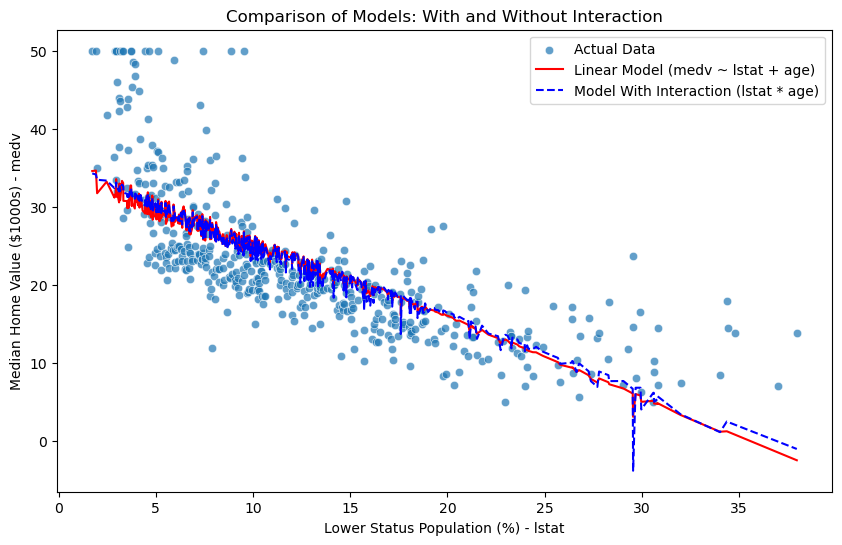

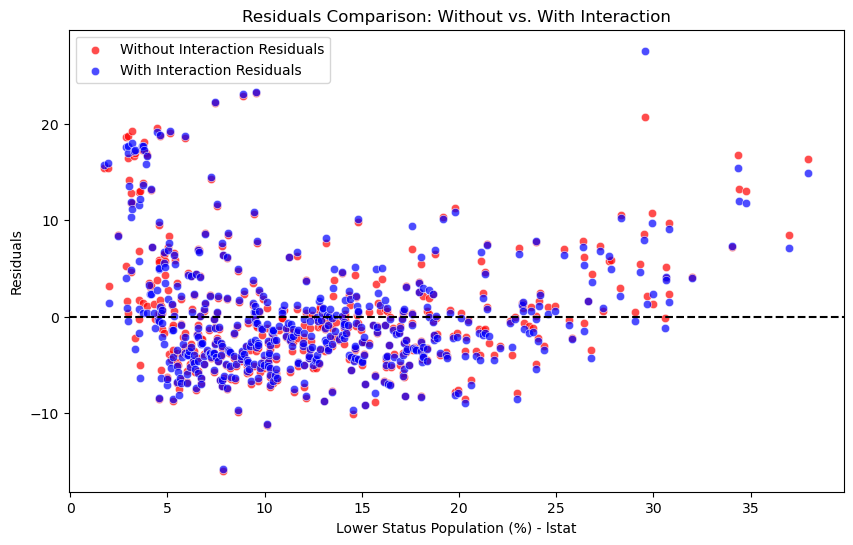

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

# Load the Boston dataset
Boston = load_data('Boston')

# Create the interaction term
Boston['lstat_age'] = Boston['lstat'] * Boston['age']

# Regression: medv ~ lstat * age
X1 = sm.add_constant(Boston[['lstat', 'age', 'lstat_age']])
y1 = Boston['medv']

model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

# ==========================
# PLOTTING RESULTS
# ==========================

# Sort values for smooth plotting
Boston_sorted = Boston.sort_values(by="lstat")
X_sorted = sm.add_constant(Boston_sorted[['lstat', 'age', 'lstat_age']])

# Predictions for models without and with interaction
y_pred_no_interaction = sm.OLS(Boston_sorted['medv'], sm.add_constant(Boston_sorted[['lstat', 'age']])).fit().predict()
y_pred_interaction = model1.predict(X_sorted)

# Scatter plot of lstat vs. medv with and without interaction term
plt.figure(figsize=(10,6))
sns.scatterplot(x=Boston_sorted["lstat"], y=Boston_sorted["medv"], alpha=0.7, label="Actual Data")
plt.plot(Boston_sorted["lstat"], y_pred_no_interaction, color="red", label="Linear Model (medv ~ lstat + age)")
plt.plot(Boston_sorted["lstat"], y_pred_interaction, color="blue", linestyle="dashed", label="Model With Interaction (lstat * age)")
plt.xlabel("Lower Status Population (%) - lstat")
plt.ylabel("Median Home Value ($1000s) - medv")
plt.title("Comparison of Models: With and Without Interaction")
plt.legend()
plt.show()

# Residual plot: Comparing models with and without interaction
plt.figure(figsize=(10,6))
residuals_no_interaction = Boston_sorted["medv"] - y_pred_no_interaction
residuals_interaction = Boston_sorted["medv"] - y_pred_interaction

sns.scatterplot(x=Boston_sorted["lstat"], y=residuals_no_interaction, alpha=0.7, label="Without Interaction Residuals", color="red")
sns.scatterplot(x=Boston_sorted["lstat"], y=residuals_interaction, alpha=0.7, label="With Interaction Residuals", color="blue")
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Lower Status Population (%) - lstat")
plt.ylabel("Residuals")
plt.title("Residuals Comparison: Without vs. With Interaction")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          1.56e-112
Time:                        21:27:55   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0

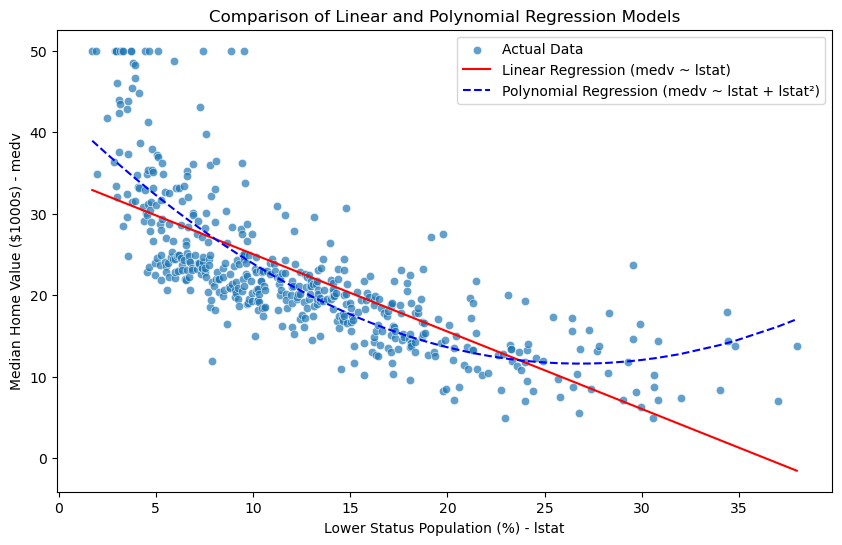

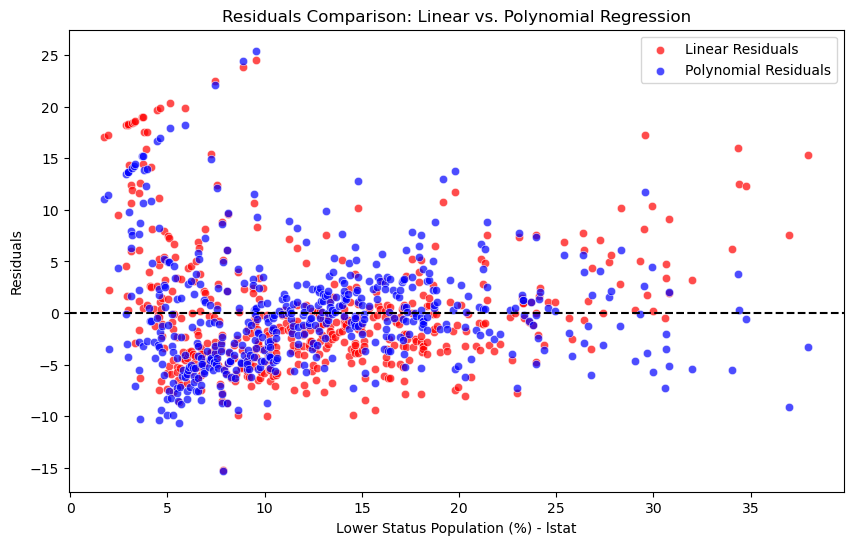

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Add lstat^2 to the dataset
Boston['lstat2'] = Boston['lstat'] ** 2

# Regression: medv ~ lstat + lstat^2
X2 = sm.add_constant(Boston[['lstat', 'lstat2']])
y2 = Boston['medv']

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

# ==========================
# PLOTTING RESULTS
# ==========================

# Sort values for smooth plotting
Boston_sorted = Boston.sort_values(by="lstat")
X_sorted = sm.add_constant(Boston_sorted[['lstat', 'lstat2']])
print(X_sorted)
# Predictions
y_pred_linear = sm.OLS(Boston_sorted['medv'], sm.add_constant(Boston_sorted[['lstat']])).fit().predict()
y_pred_poly = model2.predict(X_sorted)

# Scatter plot of lstat vs. medv with linear and polynomial regression lines
plt.figure(figsize=(10,6))
sns.scatterplot(x=Boston_sorted["lstat"], y=Boston_sorted["medv"], alpha=0.7, label="Actual Data")
plt.plot(Boston_sorted["lstat"], y_pred_linear, color="red", label="Linear Regression (medv ~ lstat)")
plt.plot(Boston_sorted["lstat"], y_pred_poly, color="blue", linestyle="dashed", label="Polynomial Regression (medv ~ lstat + lstat²)")
plt.xlabel("Lower Status Population (%) - lstat")
plt.ylabel("Median Home Value ($1000s) - medv")
plt.title("Comparison of Linear and Polynomial Regression Models")
plt.legend()
plt.show()

# Residual plot: Comparing linear vs. polynomial fit
plt.figure(figsize=(10,6))
residuals_linear = Boston_sorted["medv"] - y_pred_linear
residuals_poly = Boston_sorted["medv"] - y_pred_poly

sns.scatterplot(x=Boston_sorted["lstat"], y=residuals_linear, alpha=0.7, label="Linear Residuals", color="red")
sns.scatterplot(x=Boston_sorted["lstat"], y=residuals_poly, alpha=0.7, label="Polynomial Residuals", color="blue")
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Lower Status Population (%) - lstat")
plt.ylabel("Residuals")
plt.title("Residuals Comparison: Linear vs. Polynomial Regression")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     40.05
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.67e-10
Time:                        23:16:23   Log-Likelihood:                -963.18
No. Observations:                 400   AIC:                             1930.
Df Residuals:                     398   BIC:                             1938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.7592      0

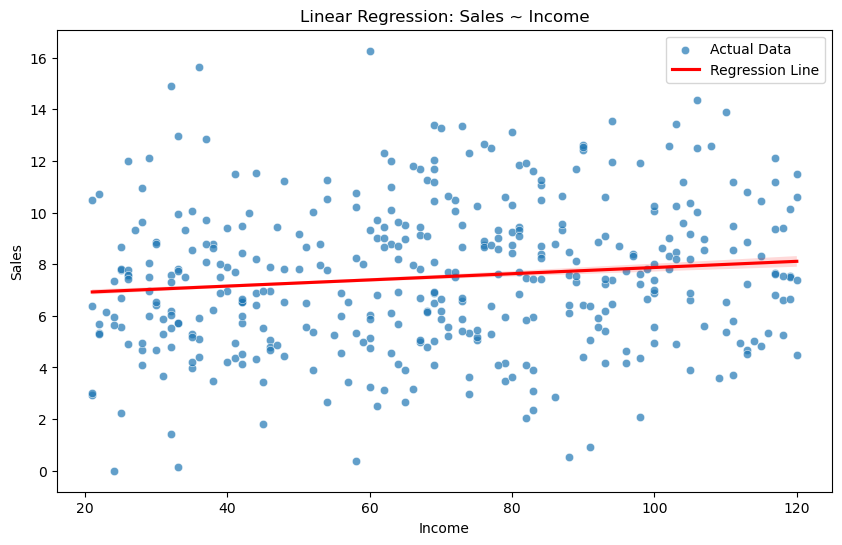

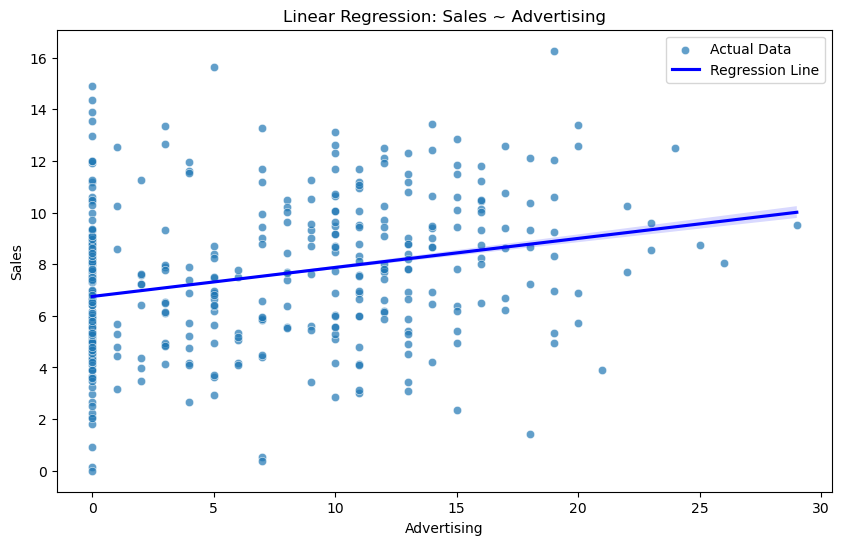

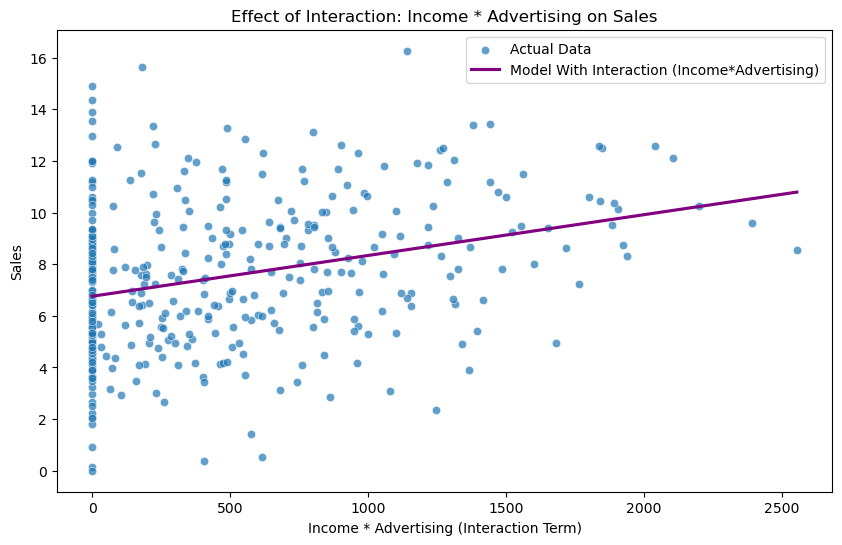

In [38]:
# Install the ISLP package if not already installed
# pip install islp

from ISLP import load_data
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Carseats dataset
df = load_data('Carseats')

# Create interaction terms
df['Income_Advertising'] = df['Income'] * df['Advertising']
df['Price_Age'] = df['Price'] * df['Age']

# Define the formula for regression
# y = Sales ~ all variables + Income:Advertising + Price:Age
formula = 'Sales ~  Income_Advertising'

# Fit the regression model
model = ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())

# ==========================
# PLOTTING RESULTS
# ==========================

# Scatter plot: Income vs. Sales with regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Income"], y=df["Sales"], alpha=0.7, label="Actual Data")
sns.regplot(x=df["Income"], y=model.fittedvalues, scatter=False, color="red", label="Regression Line")
plt.xlabel("Income")
plt.ylabel("Sales")
plt.title("Linear Regression: Sales ~ Income")
plt.legend()
plt.show()

# Scatter plot: Advertising vs. Sales with regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Advertising"], y=df["Sales"], alpha=0.7, label="Actual Data")
sns.regplot(x=df["Advertising"], y=model.fittedvalues, scatter=False, color="blue", label="Regression Line")
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.title("Linear Regression: Sales ~ Advertising")
plt.legend()
plt.show()

# Comparing the effect of interaction terms
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Income_Advertising"], y=df["Sales"], alpha=0.7, label="Actual Data")
sns.regplot(x=df["Income_Advertising"], y=model.fittedvalues, scatter=False, color="purple", label="Model With Interaction (Income*Advertising)")
plt.xlabel("Income * Advertising (Interaction Term)")
plt.ylabel("Sales")
plt.title("Effect of Interaction: Income * Advertising on Sales")
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     

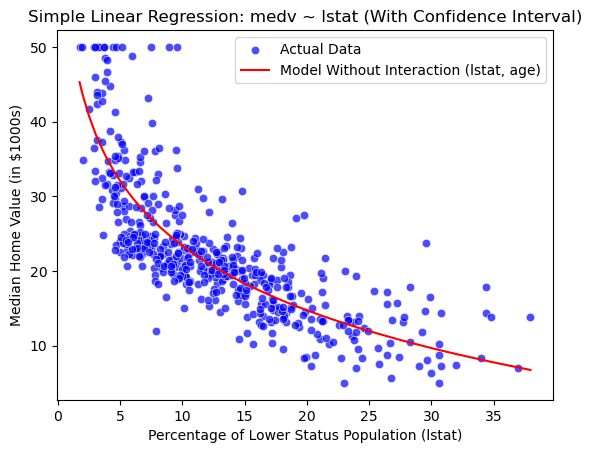

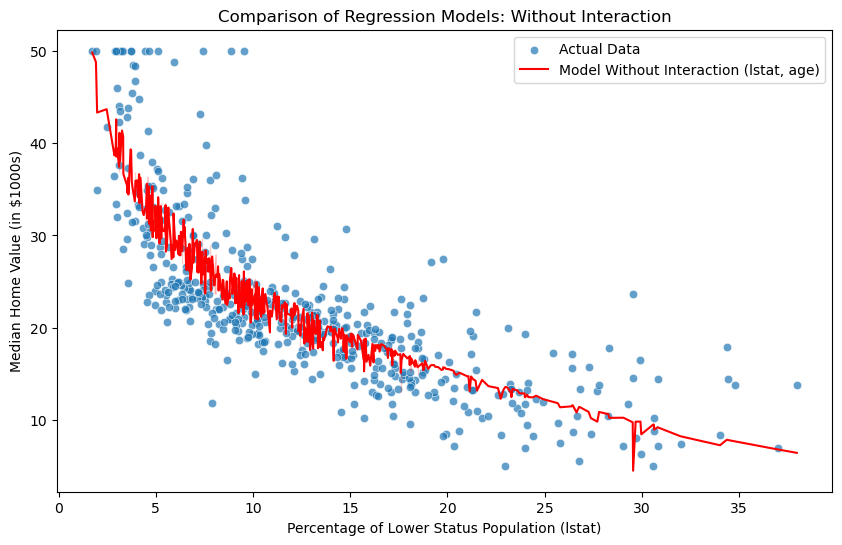

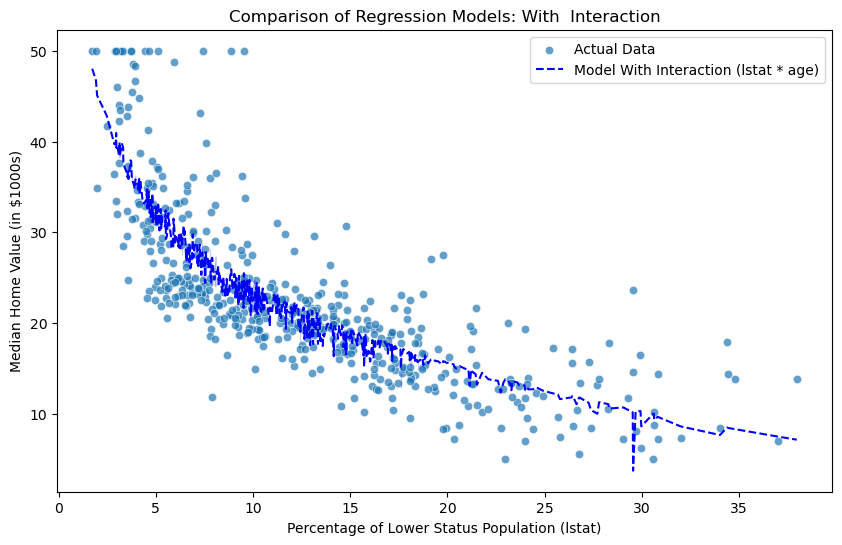

In [86]:
# ייבוא ספריות נחוצות
from ISLP import load_data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# טעינת הנתונים
df = load_data("Boston")

# הצגת מידע כללי
print(df.info())  
print(df.head())  

df['lstat_2'] = np.log(df['lstat']) 
# התאמת מודל רגרסיה ליניארית מרובת משתנים: medv ~ lstat + age
model = smf.ols('medv ~ lstat_2 + age', data=df).fit()
print(model.summary())  

# התאמת מודל רגרסיה חד-משתנית: medv ~ lstat (ללא age)
model_lstat_only = smf.ols('medv ~ lstat_2', data=df).fit()
print(model_lstat_only.summary())  


# הוספת משתנה אינטראקציה (lstat * age)
df['lstat_age'] = df['lstat_2'] * df['age'] 
interaction_model = smf.ols('medv ~ lstat_2 + lstat_age', data=df).fit()
print(interaction_model.summary())  


# ==========================
# הצגת תוצאות באמצעות גרפים
# ==========================

# גרף 1: השפעת lstat בלבד (ללא age)
sns.scatterplot(x=df["lstat"], y=df["medv"], color="blue", alpha=0.7, label="Actual Data")
sns.lineplot(x=df["lstat"], y=model_lstat_only.fittedvalues, color="red", label="Model Without Interaction (lstat, age)")
plt.xlabel("Percentage of Lower Status Population (lstat)")
plt.ylabel("Median Home Value (in $1000s)")
plt.title("Simple Linear Regression: medv ~ lstat (With Confidence Interval)")
plt.legend()
plt.show()

# גרף 2: השוואה בין המודל הבסיסי למודל עם אינטראקציה
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["lstat"], y=df["medv"], alpha=0.7, label="Actual Data")
sns.lineplot(x=df["lstat"], y=model.fittedvalues, color="red", label="Model Without Interaction (lstat, age)")
plt.xlabel("Percentage of Lower Status Population (lstat)")
plt.ylabel("Median Home Value (in $1000s)")
plt.title("Comparison of Regression Models: Without Interaction")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=df["lstat"], y=df["medv"], alpha=0.7, label="Actual Data")
sns.lineplot(x=df["lstat"], y=interaction_model.fittedvalues, color="blue", linestyle="dashed", label="Model With Interaction (lstat * age)")
plt.xlabel("Percentage of Lower Status Population (lstat)")
plt.ylabel("Median Home Value (in $1000s)")
plt.title("Comparison of Regression Models: With  Interaction")
plt.legend()
plt.show()



# 📌 ביטול השפעת משתנה על משתנה אחר ברגרסיה ליניארית

בעת ביצוע רגרסיה ליניארית מרובת משתנים, אנו עשויים לרצות למדוד את ההשפעה של משתנה אחד על המשתנה התלוי  
**תוך כדי שליטה או הסרה של השפעת משתנה אחר**. קיימות **שתי שיטות עיקריות** להתמודד עם מצב זה:

---

## **1️⃣ החזקת משתנה אחר קבוע ($Holding a Variable Constant$)י**
### ✅ **מה השיטה עושה?**
בשיטה זו, אנו **מחזיקים את המשתנה המתווך (למשל, $age$) קבוע**,  
כך שנוכל לבדוק את ההשפעה של המשתנה המרכזי (למשל, $lstat$) על המשתנה התלוי ($medv$).י

### 🔹 **איך זה עובד?**
- משאירים את המשתנה $age$ כחלק ממודל הרגרסיה ($medv$ ~ $lstat + age$). י
- **במהלך החיזוי**, מציבים את $age$ בערך קבוע (למשל, הממוצע במדגם). י
- כך, אנו **מבקרים את הביאס של $age$** מבלי להסיר את השונות שלו. י

### 🔹 **יתרונות וחסרונות**
| יתרון | חסרון |
|--------|--------|
| מאפשר לבדוק את ההשפעה של $lstat$ כאשר $age$ נמצא ברמה קבועה | השונות של $age$ עדיין משפיעה על התוצאות |
| ניתן להשוות בין קבוצות שונות של $age$י  | לא מסיר לחלוטין את ההשפעה של  $age$ על $lstat$ י |

### 🔹 **משוואת המודל לאחר קיבוע $age$**
אם יש לנו את המודל:
$$
medv = \beta_0 + \beta_1 \cdot lstat + \beta_2 \cdot age + \varepsilon
$$
ומחזיקים את $age$ בערכו הממוצע (\( $age_{\text{fixed}} = 65 $\)), אז:
$$
medv = (\beta_0 + \beta_2 \cdot 65) + \beta_1 \cdot lstat
$$
כאן ניתן לראות ש-$lstat$ משפיע ישירות על $medv$, אך $age$ כבר אינו משתנה עצמאי – רק חלק קבוע במשוואה.



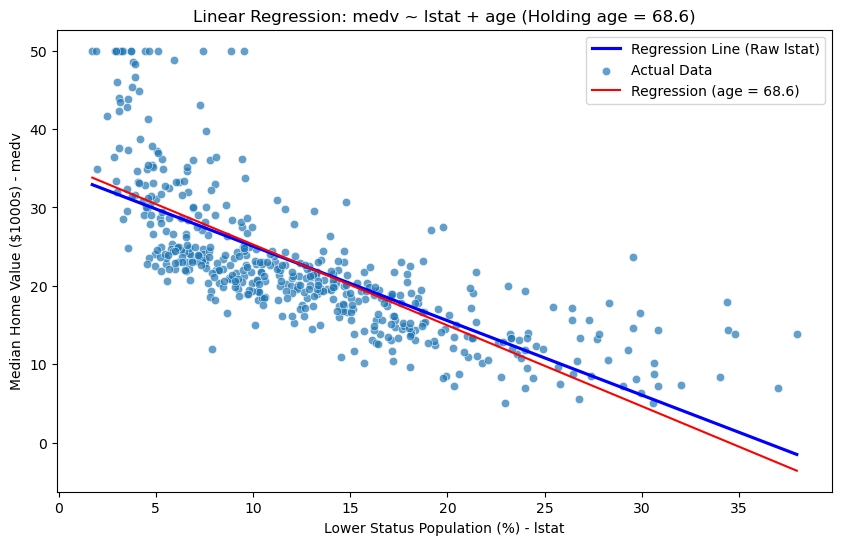

In [21]:
# 📌 דוגמא 1: החזקת age קבוע (Holding age Constant)
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

# Load the Boston dataset
Boston = load_data('Boston')

# קביעת ערך קבוע של age (למשל, הממוצע במדגם)
age_fixed = Boston["age"].mean()

# התאמת רגרסיה: medv ~ lstat + age
X = sm.add_constant(Boston[['lstat', 'age']])
y = Boston['medv']
model = sm.OLS(y, X).fit()

# יצירת תחזיות עבור ערך קבוע של age
Boston_sorted = Boston.sort_values(by="lstat").copy()
Boston_sorted["age"] = age_fixed  # מחזיקים את age קבוע

# חיזוי הערכים כאשר age מוחזק קבוע
X_fixed_age = sm.add_constant(Boston_sorted[['lstat', 'age']], has_constant='add')
y_pred_fixed_age = model.predict(X_fixed_age)

plt.figure(figsize=(10,6))

# רגרסיה של medv על lstat ללא ניהול של age
X_lstat_raw = sm.add_constant(Boston["lstat"])
model_raw = sm.OLS(Boston["medv"], X_lstat_raw).fit()

# הוספת קו הרגרסיה לגרף
sns.regplot(x=Boston["lstat"], y=model_raw.fittedvalues, scatter=False, color="blue", label="Regression Line (Raw lstat)")

# גרף פיזור של lstat מול medv עם קו רגרסיה כאשר age קבוע
sns.scatterplot(x=Boston["lstat"], y=Boston["medv"], alpha=0.7, label="Actual Data")
plt.plot(Boston_sorted["lstat"], y_pred_fixed_age, color="red", label=f"Regression (age = {age_fixed:.1f})")
plt.xlabel("Lower Status Population (%) - lstat")
plt.ylabel("Median Home Value ($1000s) - medv")
plt.title(f"Linear Regression: medv ~ lstat + age (Holding age = {age_fixed:.1f})")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     349.0
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           1.42e-59
Time:                        22:59:32   Log-Likelihood:                -1707.1
No. Observations:                 506   AIC:                             3418.
Df Residuals:                     504   BIC:                             3427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.5328      0.315     

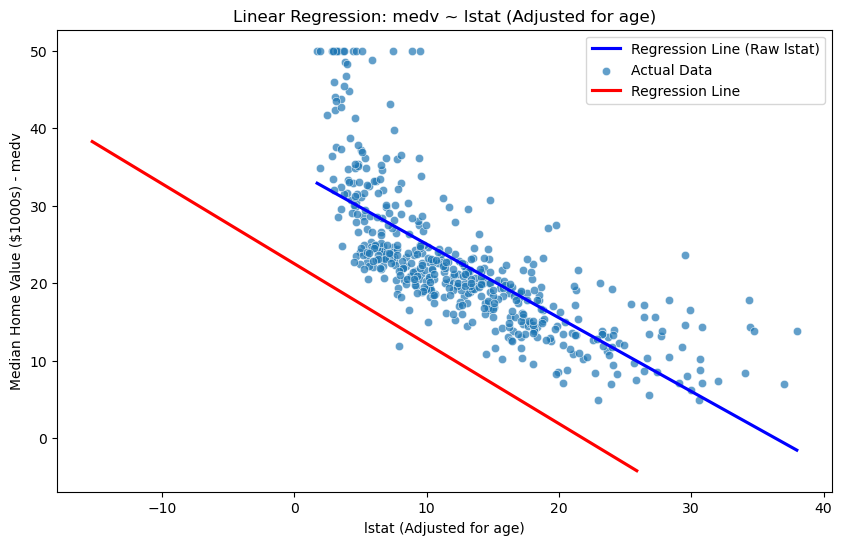

In [23]:
# 📌 דוגמא 2: שימוש בשאריות להסרת השפעת age (Residualization)
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

# Load the Boston dataset
Boston = load_data('Boston')

# הסרת ההשפעה של age על lstat באמצעות רגרסיה
X_age = sm.add_constant(Boston["age"])
model_age = sm.OLS(Boston["lstat"], X_age).fit()
Boston["lstat_residuals"] = model_age.resid  # השאריות של lstat לאחר הסרת age

# רגרסיה של medv על lstat_residuals (ללא age)
X_lstat = sm.add_constant(Boston["lstat_residuals"])
y_medv = Boston["medv"]
model = sm.OLS(y_medv, X_lstat).fit()

# הצגת סיכום המודל
print(model.summary())

plt.figure(figsize=(10,6))

# רגרסיה של medv על lstat ללא ניהול של age
X_lstat_raw = sm.add_constant(Boston["lstat"])
model_raw = sm.OLS(Boston["medv"], X_lstat_raw).fit()

# הוספת קו הרגרסיה לגרף
sns.regplot(x=Boston["lstat"], y=model_raw.fittedvalues, scatter=False, color="blue", label="Regression Line (Raw lstat)")

# גרף פיזור של lstat_residuals מול medv עם קו רגרסיה
sns.scatterplot(x=Boston["lstat"], y=Boston["medv"], alpha=0.7, label="Actual Data")
sns.regplot(x=Boston["lstat_residuals"], y=model.fittedvalues, scatter=False, color="red", label="Regression Line")
plt.xlabel("lstat (Adjusted for age)")
plt.ylabel("Median Home Value ($1000s) - medv")
plt.title("Linear Regression: medv ~ lstat (Adjusted for age)")
plt.legend()
plt.show()